In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
uber_data = pd.read_csv('UberDataset.csv')

In [26]:
# View the first few rows of the dataset
print(uber_data.head(5))

# Get information about the dataset
print(uber_data.info())

# Check for missing values
print(uber_data.isnull().sum())

         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  02-01-2016 01:25  02-01-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  02-01-2016 20:25  02-01-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  05-01-2016 17:31  05-01-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  06-01-2016 14:42  06-01-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal-Entertain  
1    5.0              NaN  
2    4.8  Errand-Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   o

In [27]:
uber_data.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [28]:
uber_data.ffill(inplace=True)

In [29]:
uber_data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [30]:
# Convert datetime columns to datetime format
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="mixed")
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format="mixed")

In [31]:
# Analyze ride times
print(uber_data['START_DATE'].dt.hour.value_counts())

# Analyze ride categories
print(uber_data['CATEGORY'].value_counts())

# Analyze ride purposes
print(uber_data['PURPOSE'].value_counts())

# Analyze ride distances
print(uber_data['MILES'].describe())

START_DATE
15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    26
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: count, dtype: int64
CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64
PURPOSE
Meeting            308
Meal-Entertain     245
Temporary Site     196
Errand-Supplies    173
Customer Visit     155
Airport-Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: count, dtype: int64
count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64


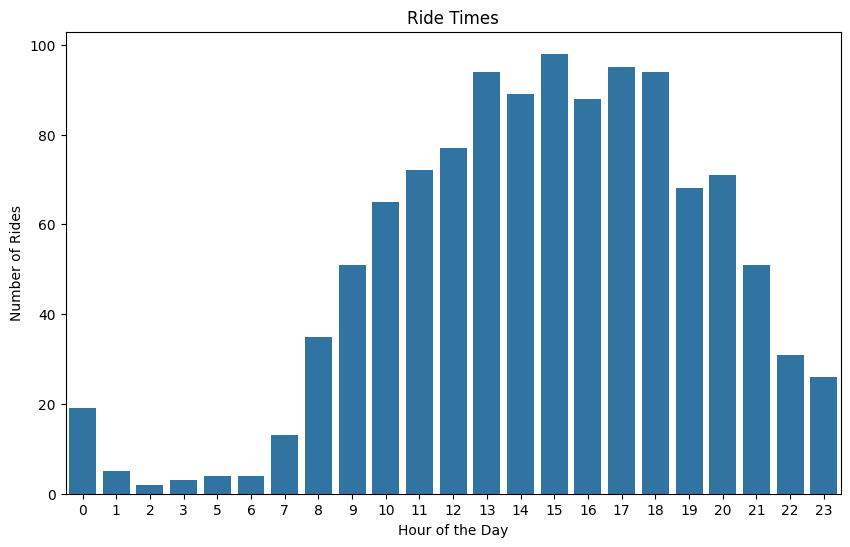

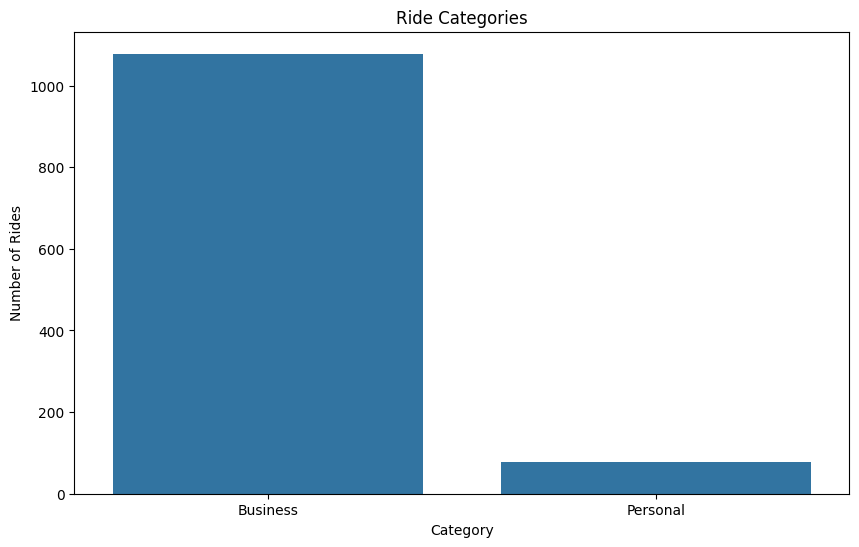

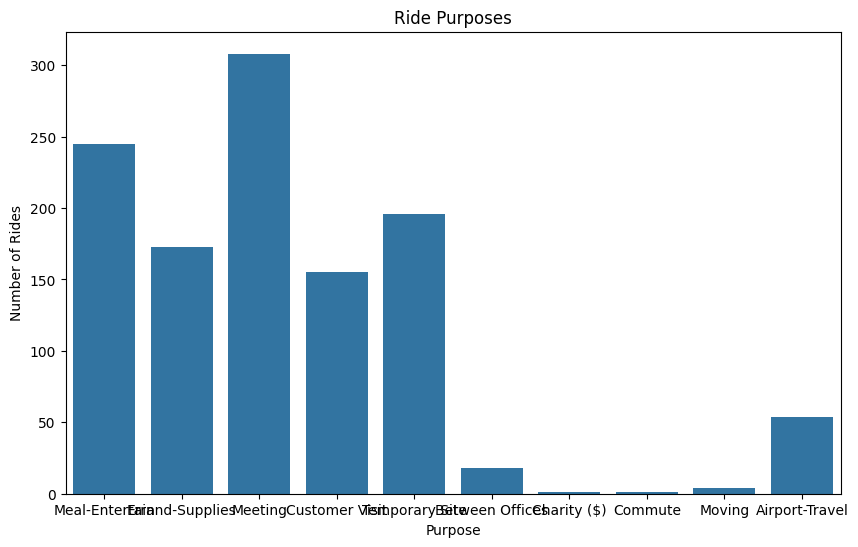

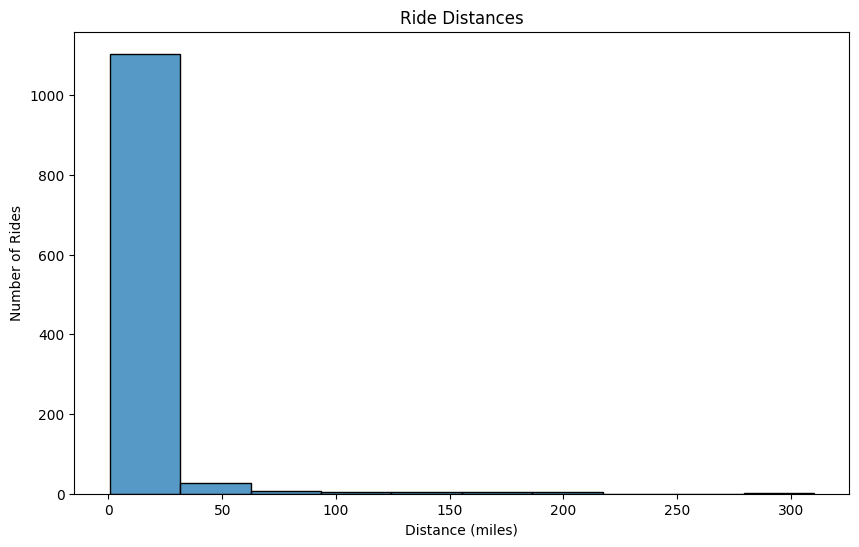

In [32]:
# Visualize ride times
plt.figure(figsize=(10,6))
sns.countplot(x=uber_data['START_DATE'].dt.hour)
plt.title('Ride Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

# Visualize ride categories
plt.figure(figsize=(10,6))
sns.countplot(x=uber_data['CATEGORY'])
plt.title('Ride Categories')
plt.xlabel('Category')
plt.ylabel('Number of Rides')
plt.show()

# Visualize ride purposes
plt.figure(figsize=(10,6))
sns.countplot(x=uber_data['PURPOSE'])
plt.title('Ride Purposes')
plt.xlabel('Purpose')
plt.ylabel('Number of Rides')
plt.show()

# Visualize ride distances
plt.figure(figsize=(10,6))
sns.histplot(uber_data['MILES'], bins=10)
plt.title('Ride Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Rides')
plt.show()